<a href="https://colab.research.google.com/github/Dundee1122/Data-Science-Analytics-Python-Coded/blob/main/Dundee_Air_Pollution_Case_Study_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Pollution Case Study**

####**Context**
In this case study, I will use an air pollution dataset which contains about 13 months of data on major pollutants and meteorological levels of a city. The data has various attributes about various pollutants and particulates in the air as well as weather and seasonal attribuutes.

#### **Objective**
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques such as PCA and t-SNE, and extract insights about the data.

#### **Dataset**
The air pollution dataset contains the following features:

**Particle Pollutants**
* NO   
* CO                     
* NO2                   
* O3                    
* SO2                   
* PM2.5                 
* Benzene               
* Toulene               
* P_Xylene             
* NOx                   
* PM10
* NH3                   
* RH  
* PD_PM2.5             
* PD_PM10              
* PD_NO2               
* PD_SO2               
* PD_CO

**Weather Attributes:**                
* WindDirection                           
* Temperature                  
* WindSpeed             
* Vertical WindSpeed     
* Solar Radiation                
* Bar Pressure           
* Weather (depicted by seasons)             




#### Import Libraries

In [ ]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Importing PCA and t-SNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE

**Loading** **Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/AirPollution.csv')

**Understanding the Structure of the Data**

In [ ]:
df.head()

,SrNo,Date,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,...,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather,PD_PM2.5,PD_PM10,PD_NO2,PD_SO2,PD_CO
0,1,04-04-2015,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,...,1.22,0.08,162.18,732.25,Summer,NaN,NaN,NaN,NaN,NaN
1,2,05-04-2015,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,...,0.62,-0.04,99.37,734.05,Summer,48.99,82.85,47.94,16.88,1.77
2,3,09-04-2015,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,...,1.55,-0.17,146.94,728.08,Summer,NaN,NaN,NaN,NaN,NaN
3,4,10-04-2015,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,...,1.18,-0.15,150.07,730.47,Summer,46.93,171.36,59.86,13.11,0.50
4,5,11-04-2015,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,...,0.88,0.15,137.01,730.62,Summer,112.95,232.22,63.56,16.19,0.77


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SrNo               403 non-null    int64  
 1   Date               403 non-null    object 
 2   NO                 401 non-null    float64
 3   CO                 402 non-null    float64
 4   NO2                401 non-null    float64
 5   O3                 397 non-null    float64
 6   SO2                399 non-null    float64
 7   PM2.5              401 non-null    float64
 8   Benzene            402 non-null    float64
 9   Toulene            402 non-null    float64
 10  P_Xylene           372 non-null    float64
 11  NOx                401 non-null    float64
 12  PM10               401 non-null    float64
 13  WindDirection      402 non-null    float64
 14  NH3                401 non-null    float64
 15  RH                 402 non-null    float64
 16  Temp               401 non

Observations:
* There are 403 observations and 27 columns in the data
* All the data are numerical values except two objects: the date of the observation and the weather, seasonally categorized
* The date and serial number (SrNO) are unique descriptors that add no value to this analysis; these columns will be dropped
* Given that the PD features most likely depict Previous Day values, which would be helpful to linear regression analysis and prediction models, they do not add value to this cluster analysis and will be dropped
* The weather variable is seasonally categorized and will be given dummy variables to convert it to numeric variables
* There are several columns that have missing data.

**Data Pre-Processing: Dropping insignificant columns, managing missing data, converting weather to numeric values**

In [ ]:
df.isnull().sum()

SrNo                  0
Date                  0
NO                    2
CO                    1
NO2                   2
O3                    6
SO2                   4
PM2.5                 2
Benzene               1
Toulene               1
P_Xylene             31
NOx                   2
PM10                  2
WindDirection         1
NH3                   2
RH                    1
Temp                  2
WindSpeed             1
VerticalWindSpeed     2
Solar                 2
BarPressure           2
Weather               0
PD_PM2.5             10
PD_PM10              11
PD_NO2               12
PD_SO2               13
PD_CO                11
dtype: int64

Observations:
All columns aside from Serial No. and Date have missing values
We'll impute the categorical variables with mode and the numerical values with the mean of their column

In [ ]:
# drop SrNo and Date and PD values
df.drop(columns = ['SrNo', 'Date', 'PD_PM2.5', 'PD_PM10', 'PD_NO2', 'PD_SO2', 'PD_CO'], inplace = True)
df.head(2)

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,PM10,WindDirection,NH3,RH,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,82.85,141.61,26.54,61.34,20.24,1.22,0.08,162.18,732.25,Summer
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,113.53,166.34,30.99,75.54,16.93,0.62,-0.04,99.37,734.05,Summer


In [ ]:
df['Weather'].unique()

array(['Summer', 'Monsoon', 'Autumn', 'Winter', 'Spring'], dtype=object)

In [ ]:
# Imputing missing values with mode for the Weather column and with median for all other columns
for col in df:
  if col == 'Weather':
    df[col].fillna(value = df[col].mode()[0], inplace = True)

  else:
    df[col]. fillna(value = df[col].median(), inplace = True)

In [ ]:
# one-hot code Weather to numeric values
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform = 'pandas')
ohe_transform = ohe.fit_transform(df[['Weather']])
ohe_transform

,Weather_Autumn,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
398,0.0,0.0,0.0,1.0,0.0
399,0.0,0.0,0.0,1.0,0.0
400,0.0,0.0,0.0,1.0,0.0
401,0.0,0.0,0.0,1.0,0.0


In [ ]:
# merge original dataframe with new Weather columns and delete the original Weather column
df = pd.concat([df, ohe_transform], axis = 1).drop(columns = ['Weather'])

In [ ]:
df.head(2)

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather_Autumn,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,20.24,1.22,0.08,162.18,732.25,0.0,0.0,0.0,1.0,0.0
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,16.93,0.62,-0.04,99.37,734.05,0.0,0.0,0.0,1.0,0.0


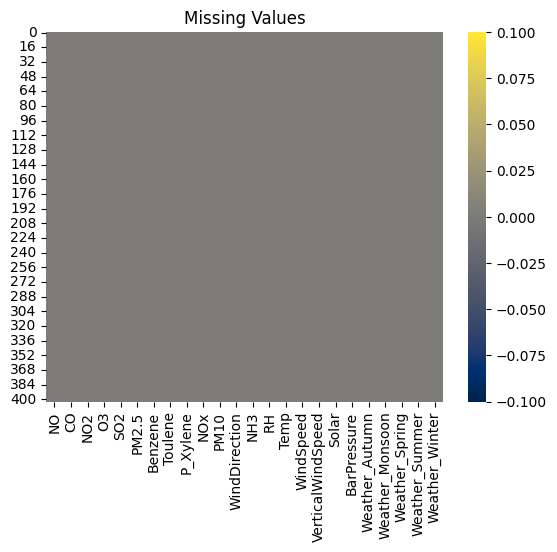

In [ ]:
# final check for missing values
sns.heatmap(df.isnull(), cmap = 'cividis')
plt.title('Missing Values')
plt.show()

 **Scale Data Values**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Temp,WindSpeed,VerticalWindSpeed,Solar,BarPressure,Weather_Autumn,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter
0,-0.762685,-0.274719,-1.028104,-0.176087,-0.360903,-0.966206,-1.005290,-0.726103,-0.766391,-1.006218,...,-0.567559,-0.032163,-0.137512,1.317447,-0.175488,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
1,-0.765059,-1.244831,-1.131729,-1.256817,-0.367671,-0.832590,-0.839185,-0.586470,-0.817281,-1.018023,...,-1.015240,-1.113804,-0.290774,-0.365088,0.828051,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
2,-0.758763,-1.069585,-0.565477,1.292291,-0.510985,-0.990760,-1.065691,-0.826253,-0.700079,-0.916904,...,0.291287,0.562740,-0.456809,0.909202,-2.500352,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
3,-0.759073,-0.900598,-0.421877,0.362069,-0.388372,-0.203844,-0.655463,-0.619211,-0.510398,-0.893437,...,0.104640,-0.104272,-0.431265,0.993048,-1.167876,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
4,-0.751125,-1.082103,-0.482810,0.449383,-0.225551,-0.300152,-0.335838,-0.119422,-0.047760,-0.903606,...,0.281819,-0.645093,-0.048109,0.643200,-1.084248,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,-0.340235,-0.812975,-0.076848,1.060245,-0.280090,1.875727,-0.959988,-0.715510,-0.505771,-0.458029,...,1.363830,0.652876,-0.431265,0.676417,0.777874,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
399,-0.690539,-0.875563,-1.100680,-0.323197,-0.072682,0.322992,-1.201595,-1.655384,-0.919061,-0.952957,...,1.286736,1.644380,-0.546212,0.806605,0.526989,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
400,-0.820278,-0.988221,-1.620747,2.175289,-0.471972,-0.793375,-1.392867,-1.655384,-1.104116,-1.160172,...,0.738969,3.158678,-0.226915,1.690064,0.705396,-0.52855,-0.426401,-0.410019,1.37061,-0.39755
401,-0.482359,-0.587658,-0.509201,-0.496467,-0.309151,-0.854521,-1.085825,-0.910996,-0.704706,-0.664178,...,-0.072539,0.166138,-0.354634,-0.670468,1.106811,-0.52855,-0.426401,-0.410019,1.37061,-0.39755


**PCA Analysis**

In [ ]:
# define the number of principal components to generate
n = df_scaled.shape[1]

# find principal components for the data
pca = PCA(n_components = n, random_state = 1)
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))

# determine the percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

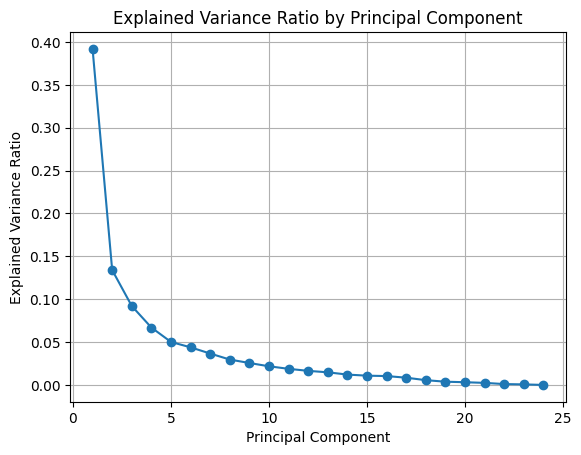

In [ ]:
# plot the explained variance ratio
plt.plot(range(1, len(exp_var) + 1), exp_var, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.grid(True)
plt.show()

In [ ]:
# find the least number of components that can explain more than 80% variance
sum = 0

for ix, i in enumerate(exp_var):

    sum = sum + i

    if(sum>0.70):
        print("Number of PCs that explain at least 80% variance: ", ix + 1)
        break

Number of PCs that explain at least 80% variance:  5


In [ ]:
# create a dataframe that shows the PCA values
cols = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5']
pc = pd.DataFrame(np.round(pca.components_.T[:, 0:5], 2), index=df_scaled.columns, columns=cols)
pc

,PCA1,PCA2,PCA3,PCA4,PCA5
NO,0.28,-0.12,-0.09,0.09,-0.18
CO,0.23,-0.01,-0.12,-0.05,-0.10
NO2,0.21,-0.27,-0.06,0.03,0.16
O3,0.01,-0.41,0.11,0.20,0.11
SO2,0.12,-0.20,0.28,0.20,-0.09
PM2.5,0.27,-0.09,0.13,-0.25,-0.08
Benzene,0.30,0.03,-0.14,0.01,0.03
Toulene,0.28,0.03,-0.24,0.09,0.01
P_Xylene,0.28,0.01,-0.18,-0.00,-0.11
NOx,0.27,-0.05,-0.15,0.10,-0.22


In [ ]:
pc.style.highlight_min()

,PCA1,PCA2,PCA3,PCA4,PCA5
NO,0.280000,-0.120000,-0.090000,0.090000,-0.180000
CO,0.230000,-0.010000,-0.120000,-0.050000,-0.100000
NO2,0.210000,-0.270000,-0.060000,0.030000,0.160000
O3,0.010000,-0.410000,0.110000,0.200000,0.110000
SO2,0.120000,-0.200000,0.280000,0.200000,-0.090000
PM2.5,0.270000,-0.090000,0.130000,-0.250000,-0.080000
Benzene,0.300000,0.030000,-0.140000,0.010000,0.030000
Toulene,0.280000,0.030000,-0.240000,0.090000,0.010000
P_Xylene,0.280000,0.010000,-0.180000,-0.000000,-0.110000
NOx,0.270000,-0.050000,-0.150000,0.100000,-0.220000


In [ ]:
def color(value):
  if value >= .25:
    return 'background: yellow'
  elif value <= -.25:
    return'background: skyblue'

pc.style.applymap(color)


,PCA1,PCA2,PCA3,PCA4,PCA5
NO,0.280000,-0.120000,-0.090000,0.090000,-0.180000
CO,0.230000,-0.010000,-0.120000,-0.050000,-0.100000
NO2,0.210000,-0.270000,-0.060000,0.030000,0.160000
O3,0.010000,-0.410000,0.110000,0.200000,0.110000
SO2,0.120000,-0.200000,0.280000,0.200000,-0.090000
PM2.5,0.270000,-0.090000,0.130000,-0.250000,-0.080000
Benzene,0.300000,0.030000,-0.140000,0.010000,0.030000
Toulene,0.280000,0.030000,-0.240000,0.090000,0.010000
P_Xylene,0.280000,0.010000,-0.180000,-0.000000,-0.110000
NOx,0.270000,-0.050000,-0.150000,0.100000,-0.220000


####**Observations**:
* The first principal component, PCA1, seems to be related to hydrocarbons like Benzene, Touline and Xylene along with Nitrous Oxide, all most likely generated via fuel combustion
* The second principal component, PCA2, seems to be related to humidity (RH), the Monsoon season (and potentially inversely related to summer weather and Ozone)
* The third principal component, PCA3, seems to be affected by temperature, wind speed and season, whether Autumn or Winter
* The fourth principal component, PCA4, seems to be related to the toxic gas, sulfur dioxide, atmospheric pressure and the weather, primarily in Spring, Summer, and Winter
The fifth principal component, PCA5, seems to be related to wind direction, which impacts pollution regardless of the pollutants in the air. The temperature is also related to the pollutant values, and the Autumn and Monsoon season also show high relationship to the PCA5 grouping

**t-SNE Analysis**

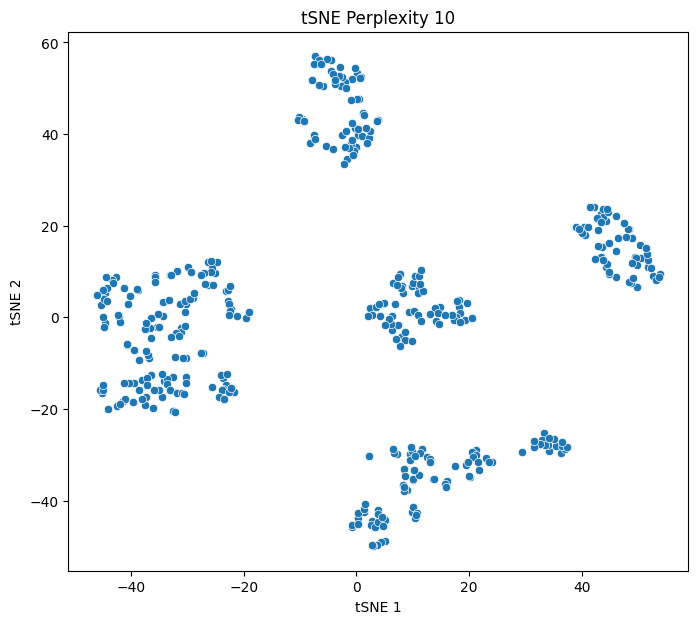

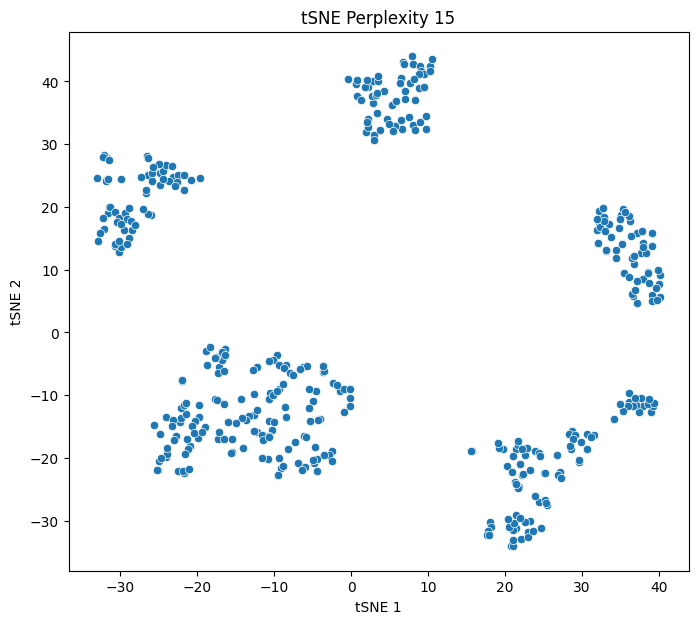

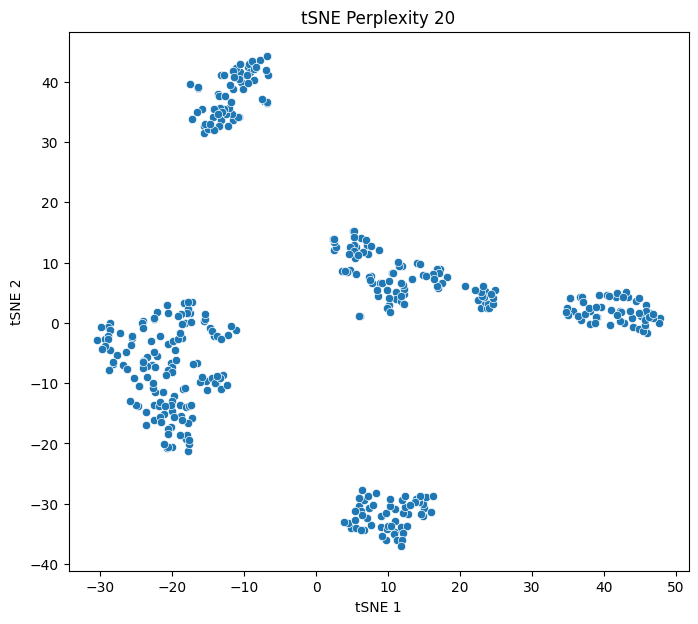

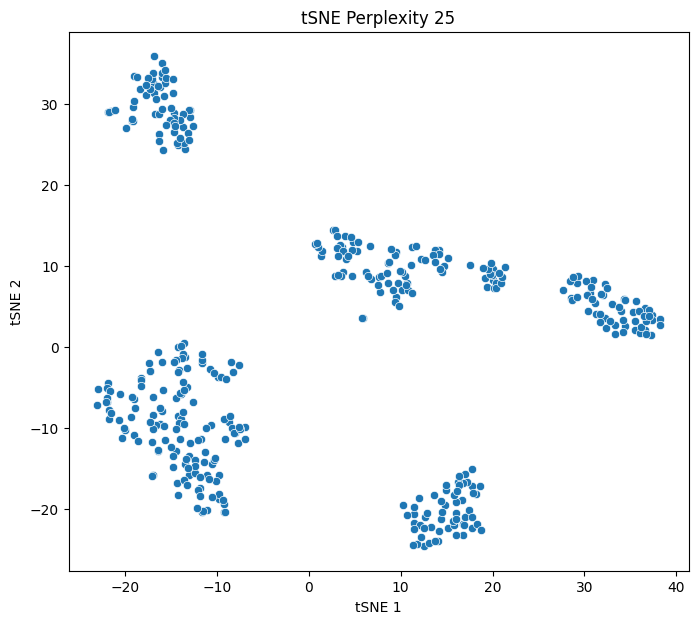

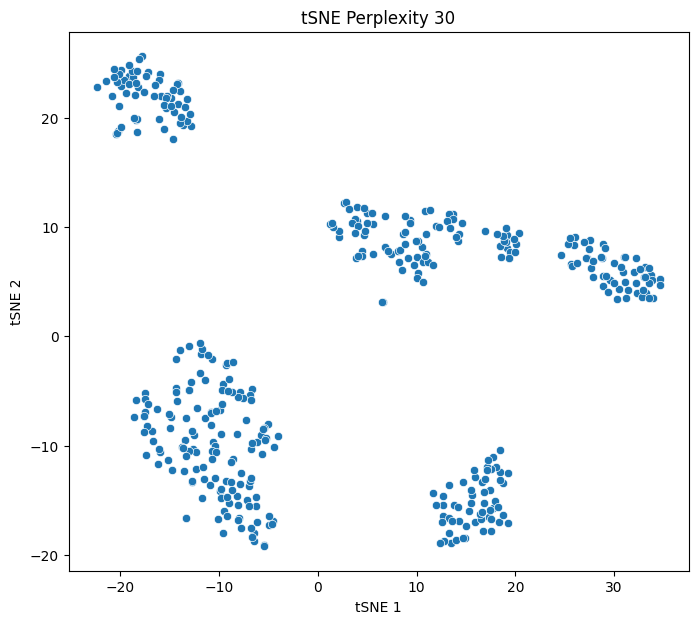

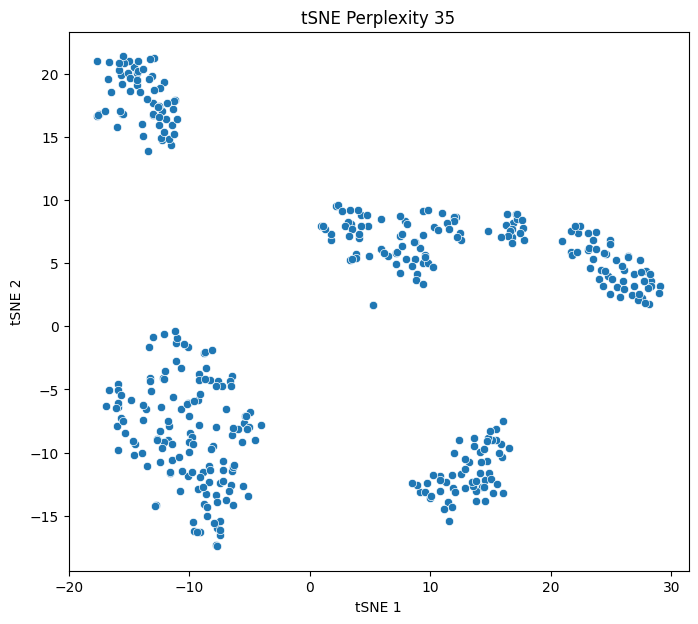

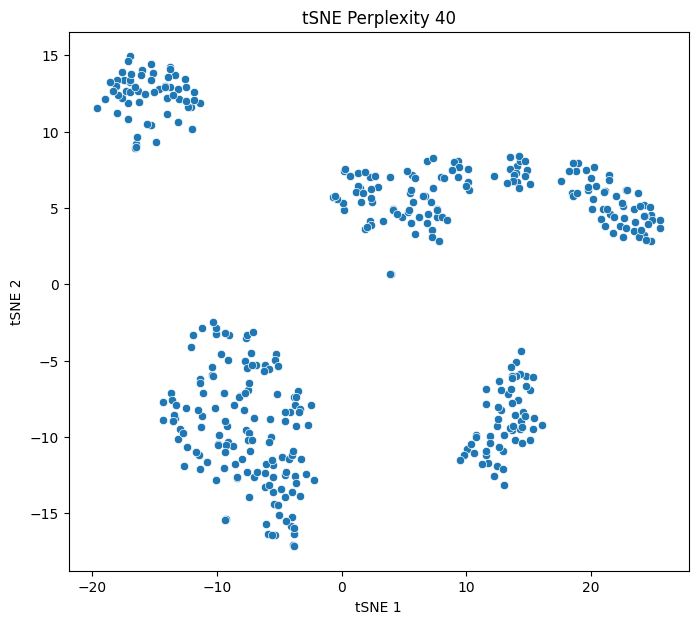

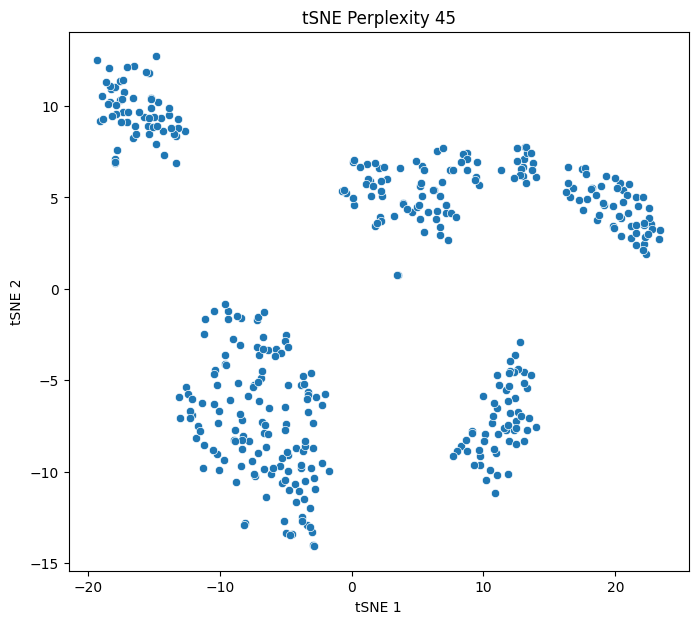

In [ ]:
tsne_results = []
for i in range (10, 50, 5):
  tsne = TSNE(n_components = 2, random_state= 1, perplexity = i)
  tsne_transf = tsne.fit_transform(df_scaled)
  tsne_results.append(pd.DataFrame(tsne_transf, columns=['X1', 'X2']))
  # plot the results, with varying perplexity values
  plt.figure(figsize = (8, 7))
  sns.scatterplot(x = 'X1', y = 'X2', data = tsne_results[-1])
  plt.xlabel('tSNE 1')
  plt.ylabel('tSNE 2')
  plt.title('tSNE Perplexity {}'.format(i))
  plt.show()

# concatenate all t-SNE results into a single DataFrame
df_tsne = pd.concat(tsne_results, ignore_index=True)

####Observations:
* We see that perplexity = 10 shows five distinct groups but as the perplexity increases, four groups appear, which seems to capture underlying values better than the first instance.
* The clearest transition appears in the perplexity = 35 plot


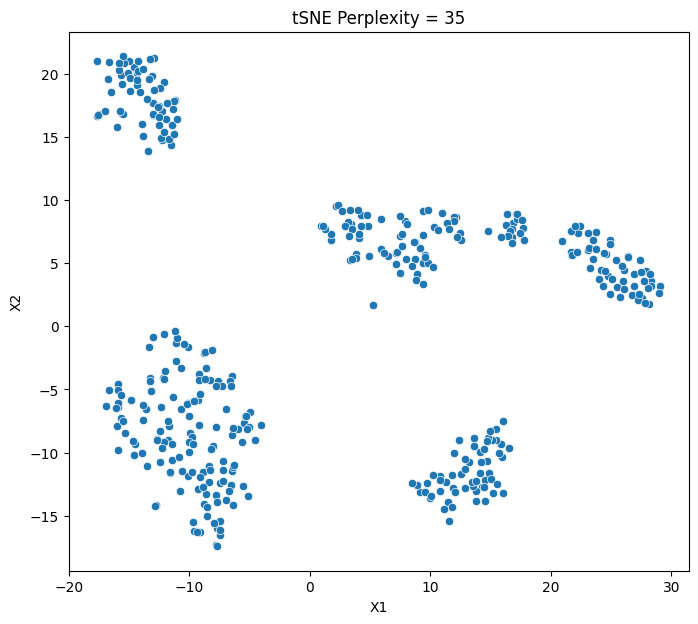

In [ ]:
# visualizing once again, using perplexity 35
tsne_results = []

tsne = TSNE(n_components = 2, random_state= 1, perplexity = 35)
tsne_transf = tsne.fit_transform(df_scaled)
tsne_results.append(pd.DataFrame(tsne_transf, columns=['X1', 'X2']))

# plot the results, with varying perplexity values
plt.figure(figsize = (8, 7))
sns.scatterplot(x = 'X1', y = 'X2', data = tsne_results[-1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('tSNE Perplexity = 35')
plt.show()

# concatenate all t-SNE results into a single DataFrame
df_tsne = pd.concat(tsne_results, ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


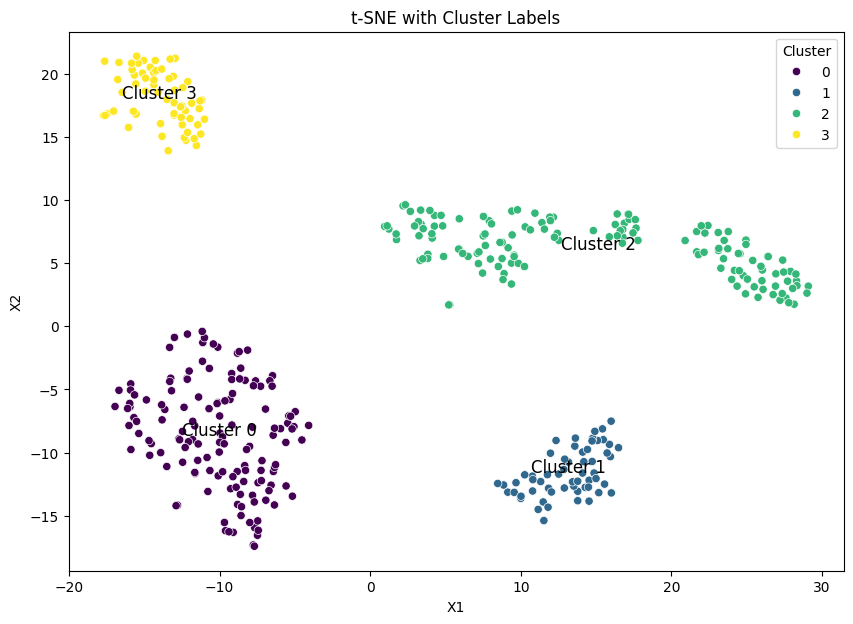

In [ ]:
# visualize the t-SNE plot and color-code the data points by cluster
from sklearn.cluster import KMeans

# initialize KMeans with the number of clusters
kmeans = KMeans(n_clusters=4, random_state=1)
cluster_labels = kmeans.fit_predict(df_tsne)

# visualize the t-SNE plot and color-code the data points by cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(x='X1', y='X2', hue=cluster_labels, palette='viridis', data=df_tsne)

# add annotations to label the clusters
for cluster in range(4):
    cluster_center = kmeans.cluster_centers_[cluster]
    plt.text(cluster_center[0], cluster_center[1], f'Cluster {cluster}', fontsize=12, color='black', ha='center')

plt.title('t-SNE with Cluster Labels')
plt.legend(title='Cluster', loc='best')
plt.show()

In [ ]:
# add cluster labels to the original DataFrame to reconcile original data to cluster groups
df['Cluster'] = cluster_labels

In [ ]:
concat_df = pd.concat([df, df_tsne])
concat_df.head(200)

,NO,CO,NO2,O3,SO2,PM2.5,Benzene,Toulene,P_Xylene,NOx,...,Solar,BarPressure,Weather_Autumn,Weather_Monsoon,Weather_Spring,Weather_Summer,Weather_Winter,Cluster,X1,X2
0,7.22,1.77,47.94,51.07,16.88,48.99,2.53,9.65,3.00,52.97,...,162.18,732.25,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
1,6.99,0.22,45.27,19.26,16.71,60.20,3.19,11.10,2.67,51.31,...,99.37,734.05,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
2,7.60,0.50,59.86,94.29,13.11,46.93,2.29,8.61,3.43,65.53,...,146.94,728.08,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
3,7.57,0.77,63.56,66.91,16.19,112.95,3.92,10.76,4.66,68.83,...,150.07,730.47,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
4,8.34,0.48,61.99,69.48,20.28,104.87,5.19,15.95,7.66,67.40,...,137.01,730.62,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,51.60,2.21,93.64,123.30,12.63,190.09,10.25,28.95,6.06,153.90,...,139.90,733.51,1.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN
196,143.66,3.42,107.26,120.12,25.19,155.18,12.48,27.68,6.06,291.76,...,83.21,732.76,1.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN
197,176.15,3.32,107.66,76.85,25.31,158.45,11.68,28.12,6.06,336.48,...,109.06,733.50,1.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN
198,259.61,4.21,126.86,86.71,26.55,179.58,14.59,39.80,6.06,467.56,...,108.94,733.51,1.0,0.0,0.0,0.0,0.0,2.0,NaN,NaN


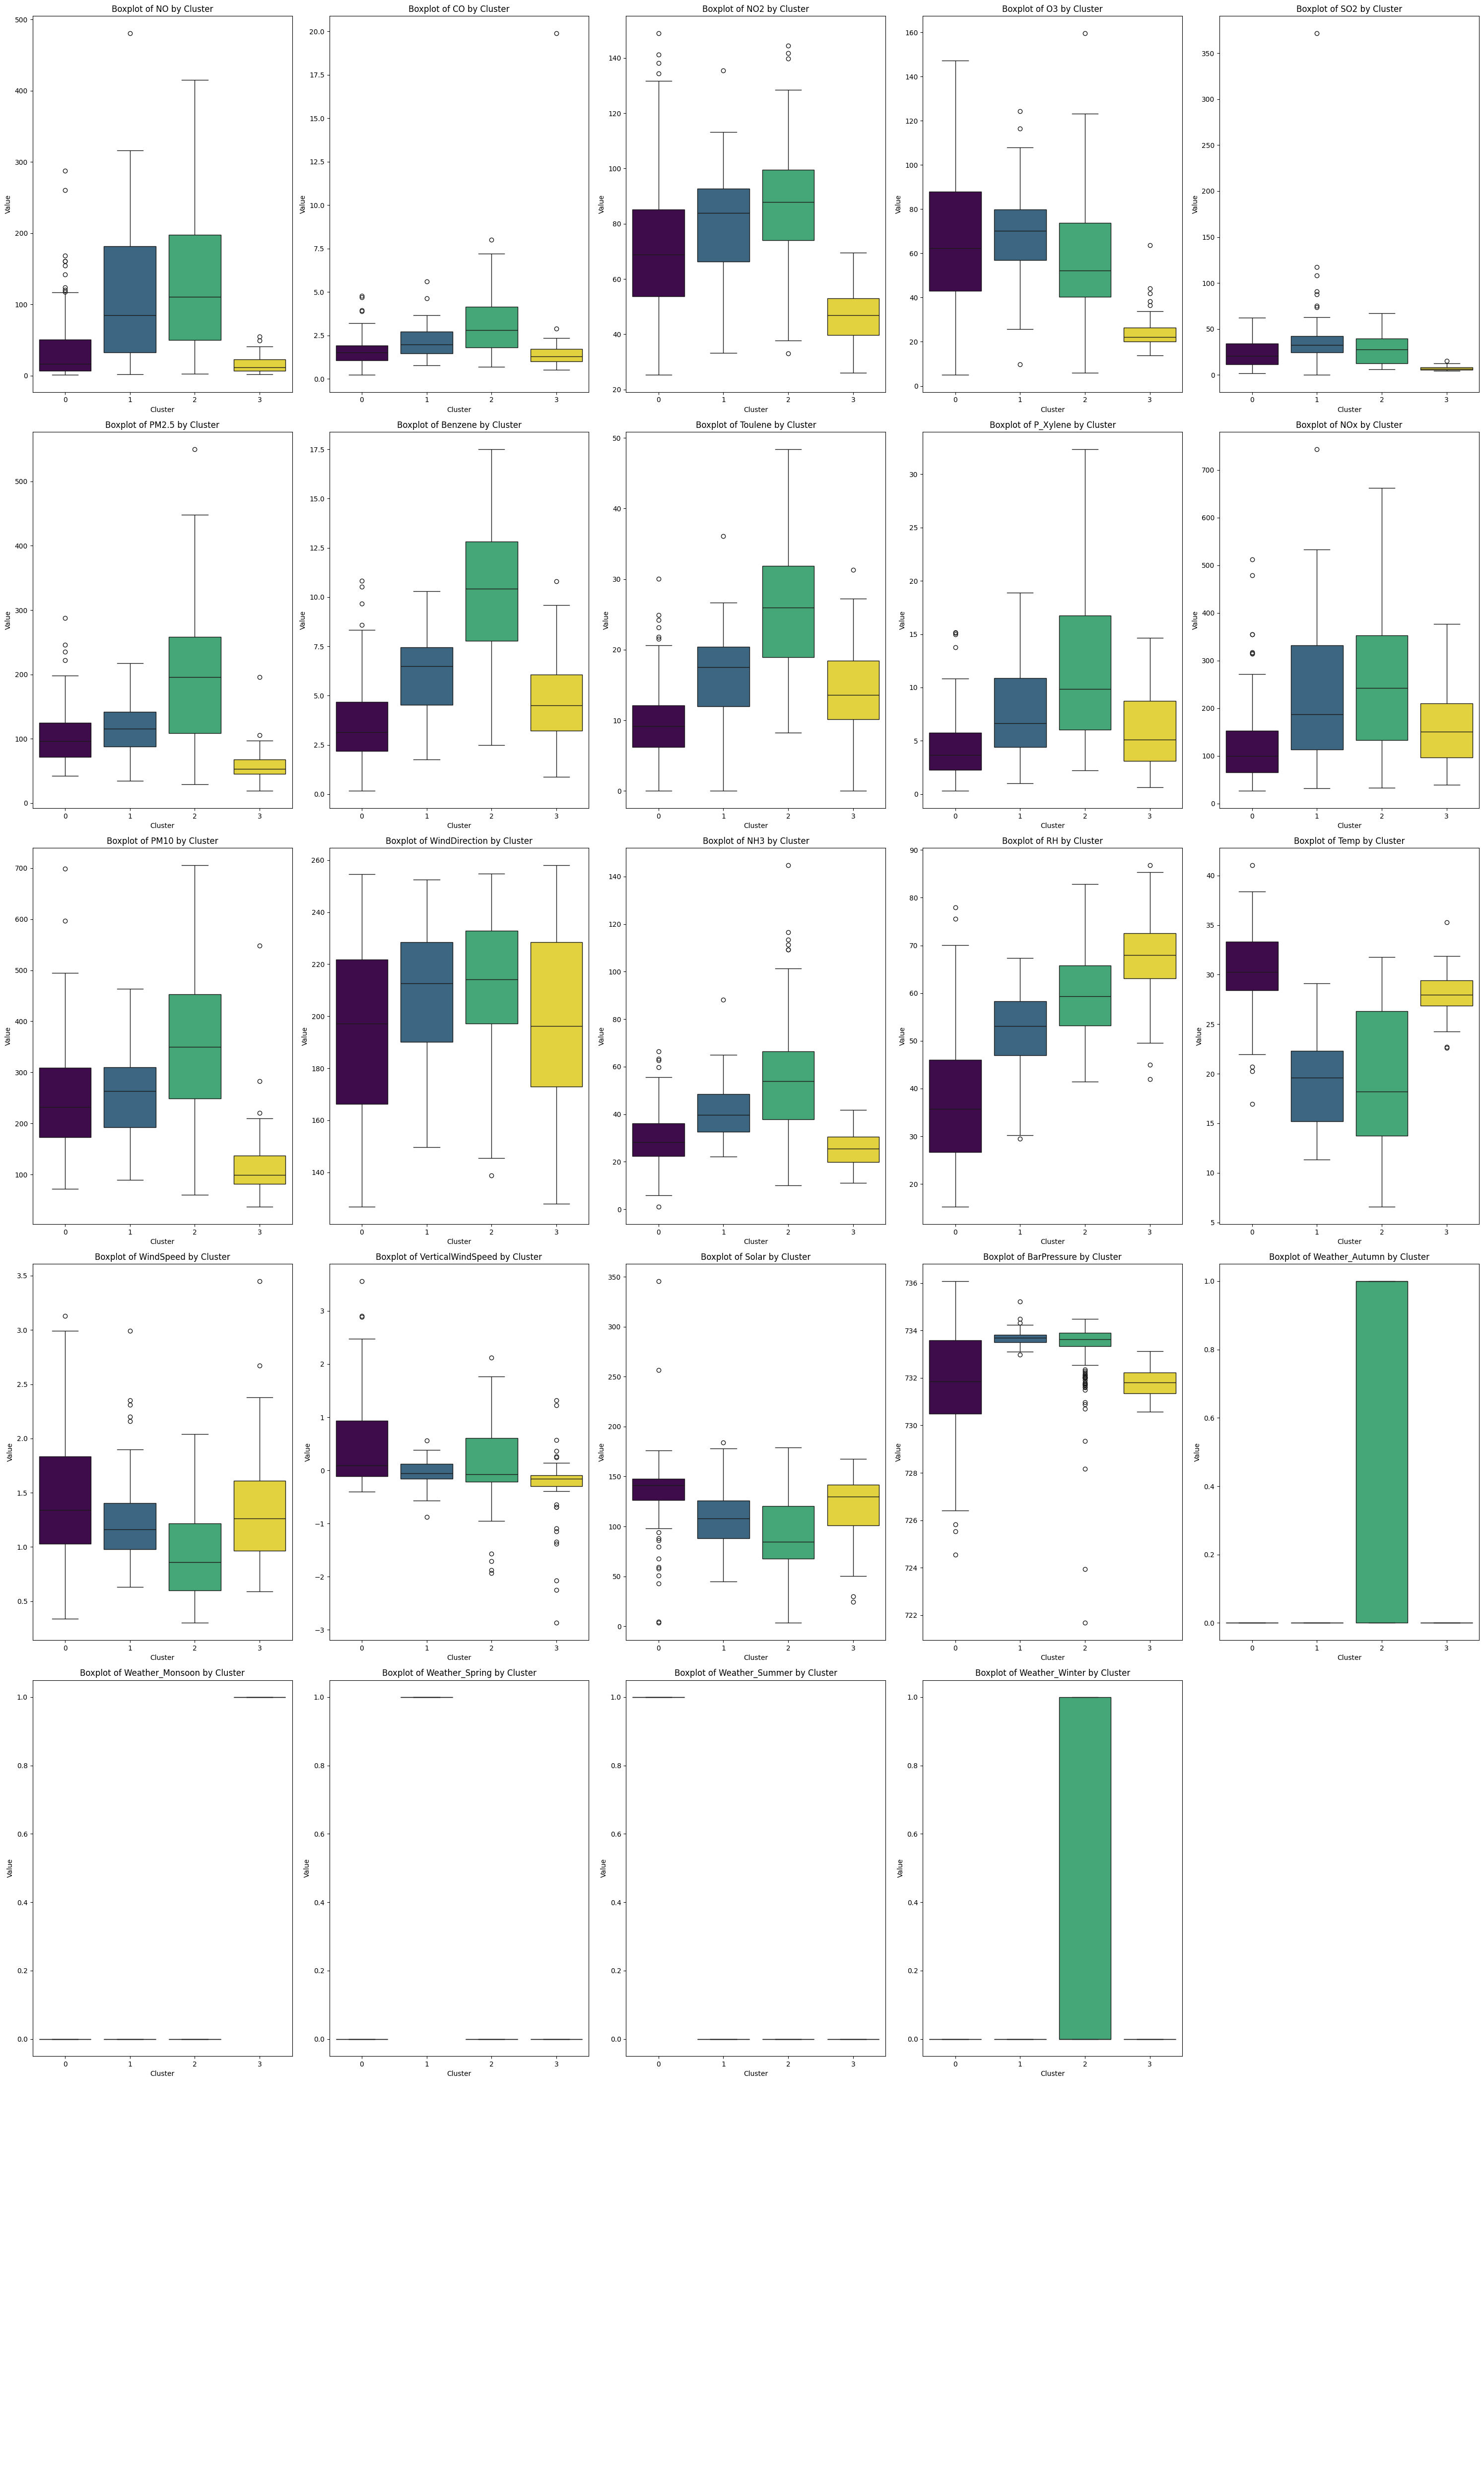

In [ ]:
all_col = df_scaled.columns[:-4].tolist()

# melt the DataFrame to create a long format suitable for boxplots
melted_df = df.melt(id_vars='Cluster', var_name='Feature', value_name='Value')

fig, axes = plt.subplots(6, 5, figsize=(30, 50))

# flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# iterate over each feature column (excluding the 'Cluster' column) and create boxplots
for i, feature in enumerate(df.columns.drop('Cluster')):
    ax = axes[i]  # Select the current subplot
    sns.boxplot(x='Cluster', y='Value', hue = 'Cluster', data=melted_df[melted_df['Feature'] == feature], ax=ax, palette='viridis', legend = False)
    ax.set_title(f'Boxplot of {feature} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Value')

# Hide empty subplots if there are fewer than 30 features
for ax in axes[len(df.columns.drop('Cluster')):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


**Observations**:

There are four groups in the data. Each group has a different set of characteristics.

**Group 0** is the largest cluster that represents a timeframe, most likely summer, with low humidity and high temperature. The  varying levels of barometric pressure accounts for the higher vertical wind speed results compared to the other groups and may explain the potential dispersion of recorded pollutants.

**Group 1** represents a timeframe, most likely spring and autumn, with several instances of high windspeed and relatively moderate air pollutant reports compared with Group 0 and 1. Wind carries air contaminants away from their source, causing them to disperse. In general, the higher the wind speed, the more contaminants are dispersed and the lower their concentration.

**Group 2 **show the highest concentration of hydrocarbons, which are generally a result of fuel combustion. These areas have a high level of fine particulate matter (PM2.5 and PM10, inhalable into the lungs and can induce adverse health effects), and other pollutants. As there is less variability in air pressure, the wind speed is low, which most likely accounts for pollutant density. The cooler temperatures can trap pollutants near the ground through temperature inversion, when a layer of warmer air sits above the colder air at the surface, acting like a cap that traps in pollution and allergens. This is especially common in areas where wood-burning is common practice during the winter.

As a result, smog, smoke, carbon dioxide, and other sources of environmental pollution can stay around for long periods of time, and they usually are not broken up until a weather event like wind, rain, or snow comes through the area.

**Group 3** represents hot and humid timeframe, most likely the Monsoon Season. As there is less variability in the pressure, the wind speed is low. Higher humidity is an indication of rain which has the potential to wash away atmospheric pollution, resulting in low levels of pollutants including fine particulate matter and hydrocarbons. However,  high humidity levels can also create an increased risk of bacteria and viruses that can cause many health issues.

